In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

from sklearn import metrics
import statsmodels.api as sm
import numpy as np

In [2]:
org_data = pd.read_excel(r'all_mapped_data.xlsx',sheetname='prep_data')

In [3]:
org_data.columns = ['month-year', 'timeStamp', 'Date', 'Omr',
       'Platts', 'Forex', 'intra_volume', 'Freigth', 'inland_sales_ado',
       'inland_sales_HO50', 'ref_pdn_ado', 'ref_prod_H050']

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
org_data.set_index('timeStamp',inplace = True)

In [244]:
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = [16,9]

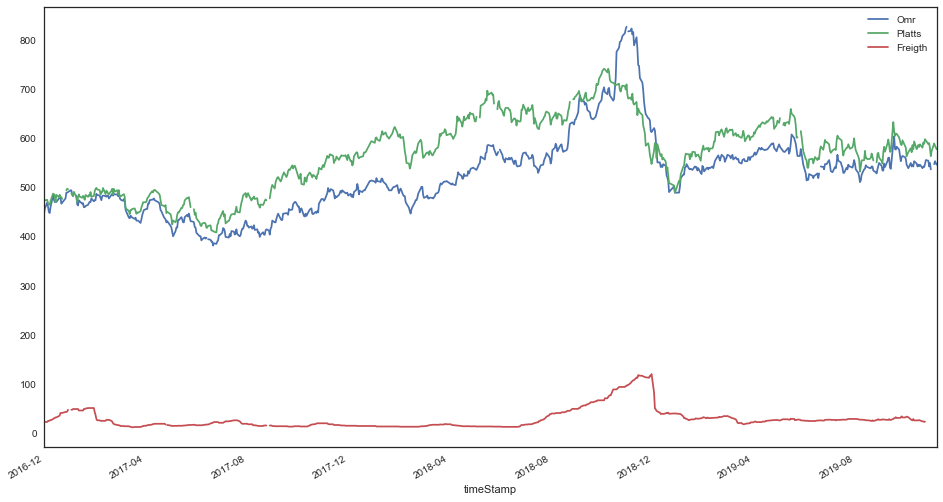

In [245]:
org_data[['Omr','Platts', 'Freigth']].plot()
plt.show()

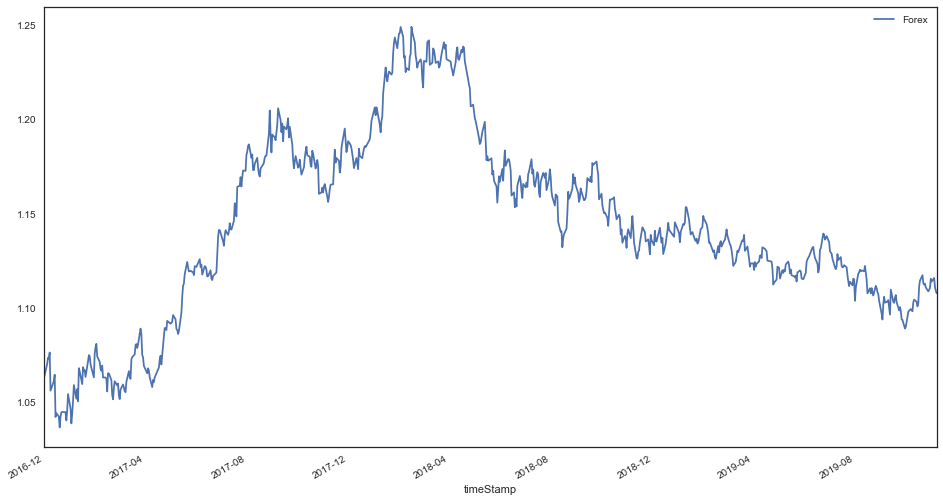

In [246]:
org_data[['Forex']].plot()
plt.show()

In [248]:
org_data[['inland_sales_ado',
       'inland_sales_HO50', 'ref_pdn_ado', 'ref_prod_H050']].dropna().plot()
plt.show()

In [249]:
org_data.describe()

Omr      Platts       Forex  intra_volume     Freigth  \
count  734.000000  730.000000  740.000000    687.000000  727.000000   
mean   522.871390  567.601027    1.142638   1313.320233   28.819739   
std     80.370357   74.931919    0.048327   1970.484934   21.179906   
min    381.400000  408.000000    1.036400      4.000000   11.800000   
25%    470.100000  497.000000    1.115075    245.500000   15.100000   
50%    525.150000  572.750000    1.138700    825.000000   23.500000   
75%    559.800000  620.187500    1.174900   1939.000000   30.675000   
max    826.300000  741.000000    1.249300  40923.000000  120.150000   

       inland_sales_ado  inland_sales_HO50  ref_pdn_ado  ref_prod_H050  
count        503.000000         503.000000   503.000000     503.000000  
mean        3172.775348        1213.236581  2637.741551     913.353877  
std          209.068355         244.923563   228.656279     121.760730  
min         2768.000000         624.000000  2180.000000     672.000000  
25%         3078.000000        1107.000000  2446.500000     817.000000  
50%         3197.000000        1290.000000  2692.000000     911.000000  
75%         3326.000000        1407.000000  2806.500000    1003.000000  
max         3572.000000        1611.000000  3030.000000    1133.000000

In [4]:
data = org_data.copy()

In [210]:
data['Omr'].quantile([0.05,0.95,0.99,1])

0.05    408.180
0.95    676.000
0.99    809.745
1.00    826.300
Name: Omr, dtype: float64

In [211]:
data['Omr'].min()

381.39999999999998

In [212]:
data['Omr'].max()

826.29999999999995

In [213]:
data = data.query('408 <= Omr <= 676')

In [5]:
stDate = pd.to_datetime("01-09-2018",format="%d-%m-%Y")
endDate = pd.to_datetime("31-12-2018",format="%d-%m-%Y")
#endDate = pd.to_datetime("01-01-2019",format="%d-%m-%Y")

In [215]:
#df = data.iloc[-120:,]
# df.shape
# data = df 

In [6]:
data = data.query('timeStamp >= @endDate | timeStamp <= @stDate')
#data = data.query('timeStamp >= @endDate')

In [7]:
data = data.loc[:,['Omr','Platts', 'Forex', 'Freigth']]

In [8]:
data.isnull().sum()

Omr         5
Platts     10
Forex       0
Freigth    13
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Omr        0
Platts     0
Forex      0
Freigth    0
dtype: int64

In [11]:
data['Omr_lag1'] = data['Omr'].shift(1)

data['Omr_lag2'] = data['Omr'].shift(2)
data['platts_lag1'] = data['Platts'].shift(1)
data['platts_lag2'] = data['Platts'].shift(2)
data['Freigth_lag1'] = data['Freigth'].shift(1)
data['Freigth_lag2'] = data['Freigth'].shift(2)

data['Forex_lag1'] = data['Forex'].shift(1)
data['Forex_lag2'] = data['Forex'].shift(2)

data['platts_diff'] = data['platts_lag1'] - data['platts_lag2']

In [12]:
data.dropna(inplace=True)

In [223]:
data.head()

Omr  Platts   Forex  Freigth  Omr_lag1  Omr_lag2  platts_lag1  \
526  518.6  526.50  1.1403    38.65     500.9     489.1       509.50   
527  525.7  541.75  1.1445    34.10     518.6     500.9       526.50   
528  525.7  544.00  1.1440    30.70     525.7     518.6       541.75   
529  539.9  559.25  1.1455    30.85     525.7     525.7       544.00   
530  541.1  568.25  1.1535    29.40     539.9     525.7       559.25   

     platts_lag2  Freigth_lag1  Freigth_lag2  Forex_lag1  Forex_lag2  
526       513.25         39.15         39.40      1.1348      1.1397  
527       509.50         38.65         39.15      1.1403      1.1348  
528       526.50         34.10         38.65      1.1445      1.1403  
529       541.75         30.70         34.10      1.1440      1.1445  
530       544.00         30.85         30.70      1.1455      1.1440

In [224]:
data.columns

Index(['Omr', 'Platts', 'Forex', 'Freigth', 'Omr_lag1', 'Omr_lag2',
       'platts_lag1', 'platts_lag2', 'Freigth_lag1', 'Freigth_lag2',
       'Forex_lag1', 'Forex_lag2'],
      dtype='object')

In [225]:
data.drop(['Platts', 'Forex', 'Freigth'],inplace=True,axis=1)

In [13]:
data.head()

Omr  Platts   Forex  Freigth  Omr_lag1  Omr_lag2  platts_lag1  \
2  468.9  474.50  1.0702    22.85     455.9     441.7       473.25   
3  460.7  467.50  1.0734    24.85     468.9     455.9       474.50   
4  450.0  465.50  1.0730    24.85     460.7     468.9       467.50   
5  447.6  464.50  1.0762    26.10     450.0     460.7       465.50   
6  459.5  471.75  1.0559    26.10     447.6     450.0       464.50   

   platts_lag2  Freigth_lag1  Freigth_lag2  Forex_lag1  Forex_lag2  \
2       471.75         22.85         22.85      1.0642      1.0627   
3       473.25         22.85         22.85      1.0702      1.0642   
4       474.50         24.85         22.85      1.0734      1.0702   
5       467.50         24.85         24.85      1.0730      1.0734   
6       465.50         26.10         24.85      1.0762      1.0730   

   platts_diff  
2         1.50  
3         1.25  
4        -7.00  
5        -2.00  
6        -1.00

In [14]:
data.corr()

Omr    Platts     Forex   Freigth  Omr_lag1  Omr_lag2  \
Omr           1.000000  0.893250  0.022667  0.356369  0.985804  0.970439   
Platts        0.893250  1.000000  0.432943  0.066365  0.877109  0.861334   
Forex         0.022667  0.432943  1.000000 -0.489122  0.016168  0.009892   
Freigth       0.356369  0.066365 -0.489122  1.000000  0.357250  0.356859   
Omr_lag1      0.985804  0.877109  0.016168  0.357250  1.000000  0.985773   
Omr_lag2      0.970439  0.861334  0.009892  0.356859  0.985773  1.000000   
platts_lag1   0.889534  0.987126  0.425186  0.070487  0.893280  0.877290   
platts_lag2   0.879560  0.974452  0.416869  0.073949  0.889628  0.893481   
Freigth_lag1  0.350646  0.058367 -0.490195  0.992748  0.356202  0.356909   
Freigth_lag2  0.345326  0.050204 -0.491334  0.980932  0.350551  0.355922   
Forex_lag1    0.031508  0.439727  0.994699 -0.487777  0.025452  0.019473   
Forex_lag2    0.040121  0.445614  0.989524 -0.485677  0.034320  0.028787   
platts_diff   0.056500  0.072724  0.049176 -0.022076  0.017003 -0.106807   

              platts_lag1  platts_lag2  Freigth_lag1  Freigth_lag2  \
Omr              0.889534     0.879560      0.350646      0.345326   
Platts           0.987126     0.974452      0.058367      0.050204   
Forex            0.425186     0.416869     -0.490195     -0.491334   
Freigth          0.070487     0.073949      0.992748      0.980932   
Omr_lag1         0.893280     0.889628      0.356202      0.350551   
Omr_lag2         0.877290     0.893481      0.356909      0.355922   
platts_lag1      1.000000     0.987165      0.066189      0.058254   
platts_lag2      0.987165     1.000000      0.070316      0.066065   
Freigth_lag1     0.066189     0.070316      1.000000      0.992751   
Freigth_lag2     0.058254     0.066065      0.992751      1.000000   
Forex_lag1       0.435390     0.427506     -0.488298     -0.489423   
Forex_lag2       0.442188     0.437713     -0.486928     -0.487502   
platts_diff      0.073652    -0.086566     -0.026199     -0.049156   

              Forex_lag1  Forex_lag2  platts_diff  
Omr             0.031508    0.040121     0.056500  
Platts          0.439727    0.445614     0.072724  
Forex           0.994699    0.989524     0.049176  
Freigth        -0.487777   -0.485677    -0.022076  
Omr_lag1        0.025452    0.034320     0.017003  
Omr_lag2        0.019473    0.028787    -0.106807  
platts_lag1     0.435390    0.442188     0.073652  
platts_lag2     0.427506    0.437713    -0.086566  
Freigth_lag1   -0.488298   -0.486928    -0.026199  
Freigth_lag2   -0.489423   -0.487502    -0.049156  
Forex_lag1      1.000000    0.994716     0.046401  
Forex_lag2      0.994716    1.000000     0.025073  
platts_diff     0.046401    0.025073     1.000000

In [16]:
prep_data = data.copy()

In [17]:
prep_data.shape

(632, 13)

In [18]:
for idx in range(len(prep_data)):
    df = prep_data.iloc[idx:idx+59,]
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [230]:
Y = prep_data.pop('Omr')

X = prep_data

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Omr   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     152.4
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.24e-78
Time:                        18:09:49   Log-Likelihood:                -674.09
No. Observations:                 200   AIC:                             1366.
Df Residuals:                     191   BIC:                             1396.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          145.9496     56.830      2.568   

In [236]:
# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,random_state=100) 

regr = LinearRegression() 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

5.54582951934
6.80661458041


In [238]:
pd.Series(regr.coef_,X.columns)

const           0.000000e+00
Omr_lag1        5.659315e-01
Omr_lag2        6.045627e-02
platts_lag1     4.157097e+12
platts_lag2    -4.157097e+12
Freigth_lag1    8.898561e-01
Freigth_lag2   -7.613987e-01
Forex_lag1      1.806422e+02
Forex_lag2     -2.437052e+02
platts_diff    -4.157097e+12
dtype: float64

In [232]:
X.shape

(200, 10)

In [233]:
from sklearn.ensemble import RandomForestRegressor

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state=100)

regr = RandomForestRegressor(max_depth=4, random_state=0,
                             n_estimators=300,min_samples_split=10,
                             min_samples_leaf=5)
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6.81929627473
8.92906658013


In [235]:
X.shape

(200, 10)